# Avocado average price prediction using regression(Aditya Chowdhury)

Importing necessary libraries and loading the dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

avoc=pd.read_csv('Avocado.csv')
avoc

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Dropping Unnecessary Columns

In [2]:
avoc.drop(['Unnamed: 0','Date'],axis=1,inplace=True)
avoc

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Data shape

In [3]:
avoc.shape

(18249, 12)

Data detailed information

In [4]:
avoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


Data description

In [5]:
avoc.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Checking Null Values

In [6]:
avoc.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Checking Missing Values

<AxesSubplot:>

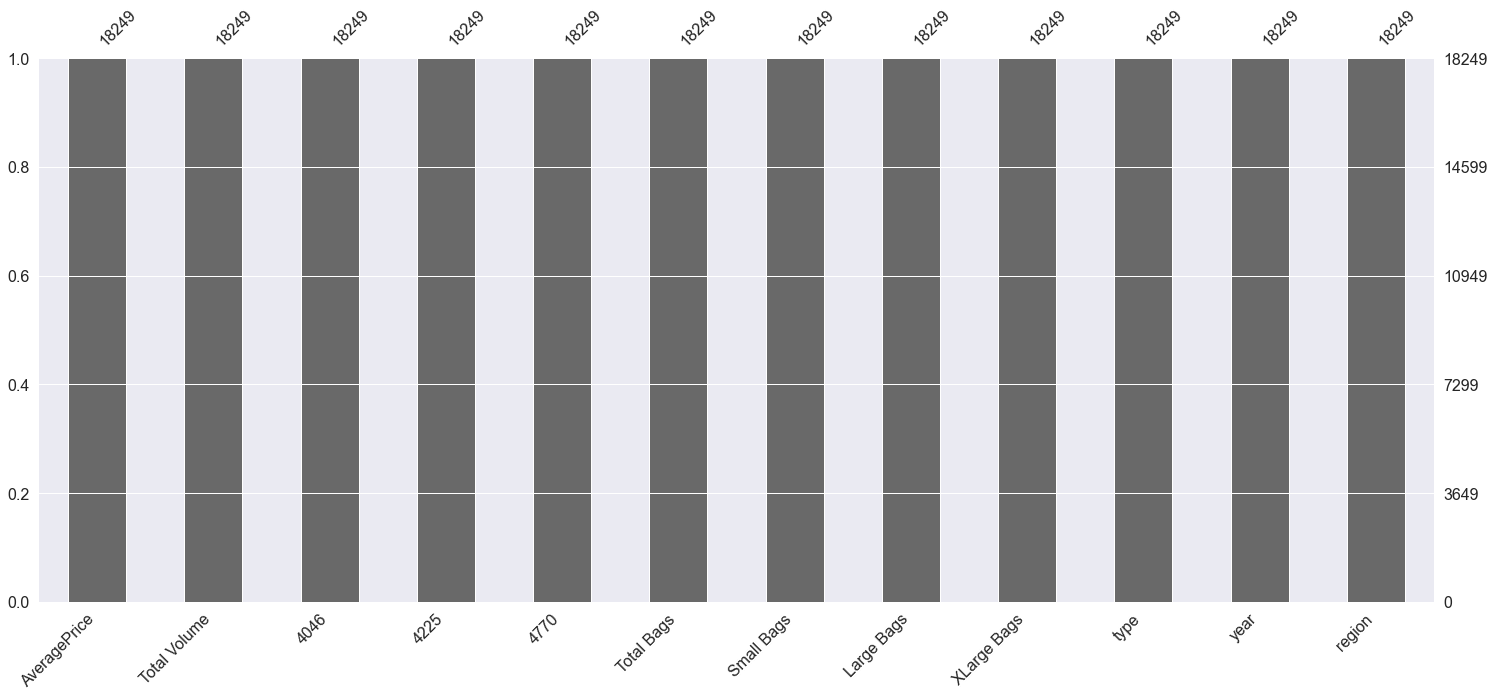

In [7]:
msno.bar(avoc)

Checking Duplicate Values

In [8]:
avoc[avoc.duplicated()]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


Outlier Detection

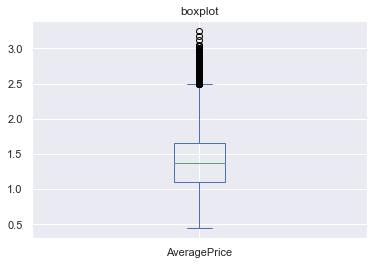

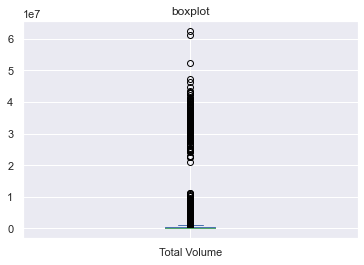

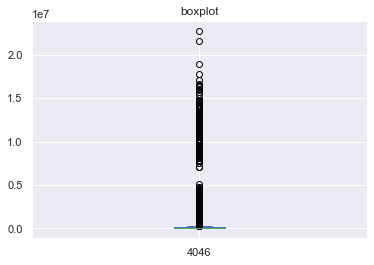

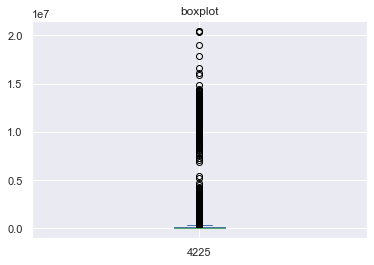

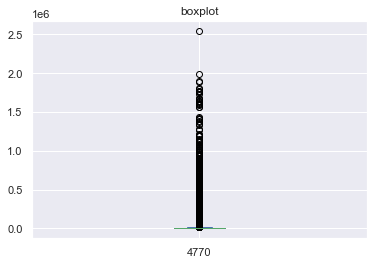

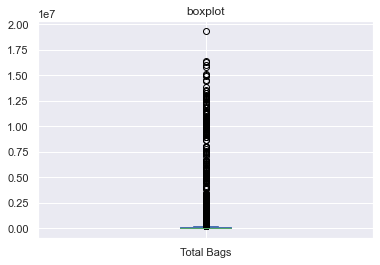

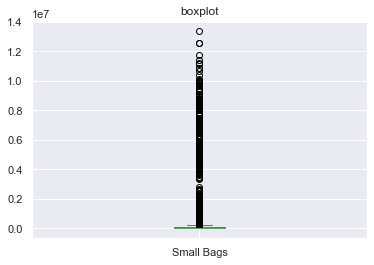

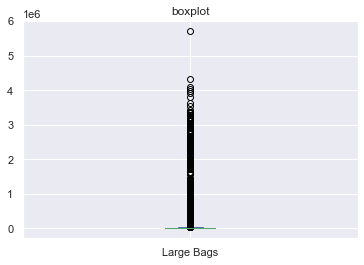

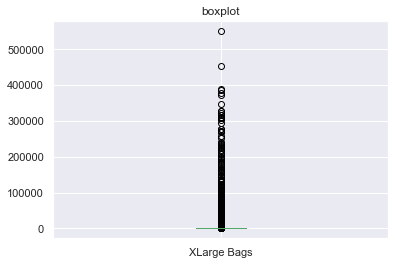

In [9]:
df=avoc.drop(columns=['type','year','region'])
for col in df:
    a=avoc[col].plot(kind='box',title='boxplot')
    plt.show()
    

Outlier Treatment of data

In [10]:
Q1=avoc['AveragePrice'].quantile(.25)
Q3=avoc['AveragePrice'].quantile(.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
avoc['AveragePrice']=np.where(avoc['AveragePrice']>upper,upper,np.where(avoc['AveragePrice']<lower,lower,avoc['AveragePrice']))

Q1=avoc['Total Volume'].quantile(.25)
Q3=avoc['Total Volume'].quantile(.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
avoc['Total Volume']=np.where(avoc['Total Volume']>upper,upper,np.where(avoc['Total Volume']<lower,lower,avoc['Total Volume']))

Q1=avoc['4046'].quantile(.25)
Q3=avoc['4046'].quantile(.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
avoc['4046']=np.where(avoc['4046']>upper,upper,np.where(avoc['4046']<lower,lower,avoc['4046']))

Q1=avoc['4225'].quantile(.25)
Q3=avoc['4225'].quantile(.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
avoc['4225']=np.where(avoc['4225']>upper,upper,np.where(avoc['4225']<lower,lower,avoc['4225']))

Q1=avoc['4770'].quantile(.25)
Q3=avoc['4770'].quantile(.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
avoc['4770']=np.where(avoc['4770']>upper,upper,np.where(avoc['4770']<lower,lower,avoc['4770']))

Q1=avoc['Total Bags'].quantile(.25)
Q3=avoc['Total Bags'].quantile(.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
avoc['Total Bags']=np.where(avoc['Total Bags']>upper,upper,np.where(avoc['Total Bags']<lower,lower,avoc['Total Bags']))

Q1=avoc['Small Bags'].quantile(.25)
Q3=avoc['Small Bags'].quantile(.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
avoc['Small Bags']=np.where(avoc['Small Bags']>upper,upper,np.where(avoc['Small Bags']<lower,lower,avoc['Small Bags']))

Q1=avoc['Large Bags'].quantile(.25)
Q3=avoc['Large Bags'].quantile(.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
avoc['Large Bags']=np.where(avoc['Large Bags']>upper,upper,np.where(avoc['Large Bags']<lower,lower,avoc['Large Bags']))

Q1=avoc['XLarge Bags'].quantile(.25)
Q3=avoc['XLarge Bags'].quantile(.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
avoc['XLarge Bags']=np.where(avoc['XLarge Bags']>upper,upper,np.where(avoc['XLarge Bags']<lower,lower,avoc['XLarge Bags']))

Outliers have been treated

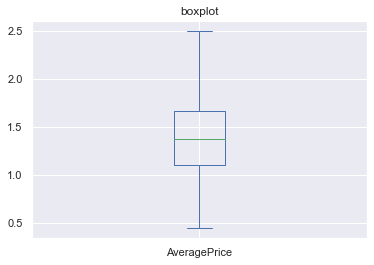

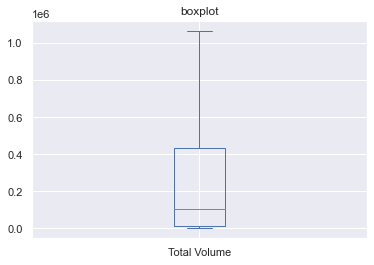

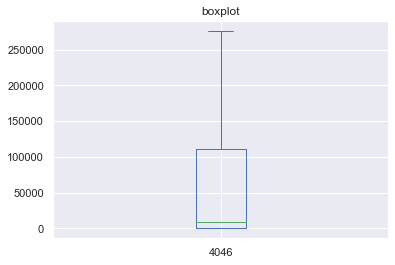

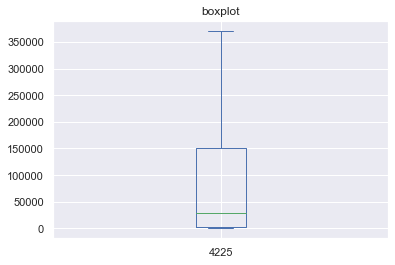

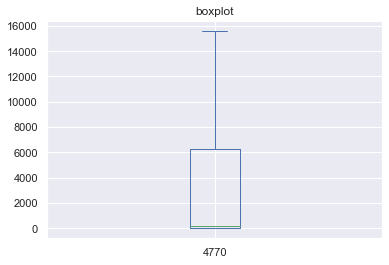

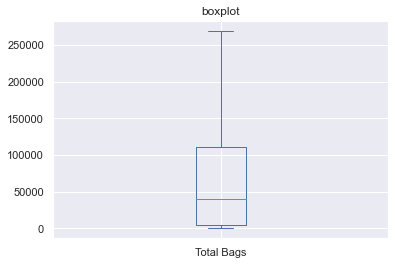

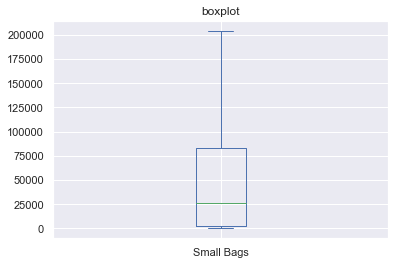

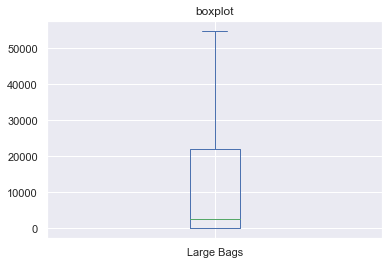

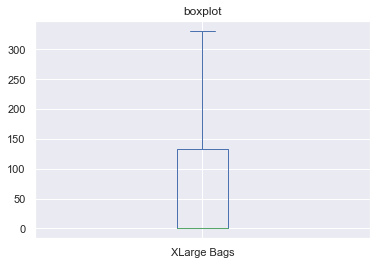

In [11]:
for col in df:
    a=avoc[col].plot(kind='box',title='boxplot')
    plt.show()

Unique values in 'Type' column 

In [12]:
print(avoc['type'].unique())

['conventional' 'organic']


Number of unique regions

In [13]:
print(avoc['region'].nunique())

54


In [14]:
avoc_type=pd.DataFrame(avoc.groupby('type')['AveragePrice'].mean())
avoc_type.sort_values(by=['AveragePrice'],ascending=False)

,AveragePrice
type,
organic,1.649377
conventional,1.158040


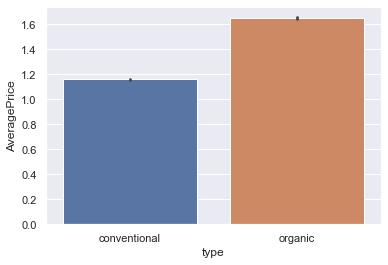

In [15]:
sns.barplot(x='type',y='AveragePrice',data=avoc)
plt.show()

In [16]:
a=pd.DataFrame(avoc.groupby('region')['AveragePrice'].mean())
a.sort_values(by=['AveragePrice'],ascending=False)

,AveragePrice
region,
HartfordSpringfield,1.813964
SanFrancisco,1.768254
NewYork,1.727130
Philadelphia,1.632130
Sacramento,1.619615
Northeast,1.601923
Charlotte,1.600503
Albany,1.561036
Chicago,1.556775


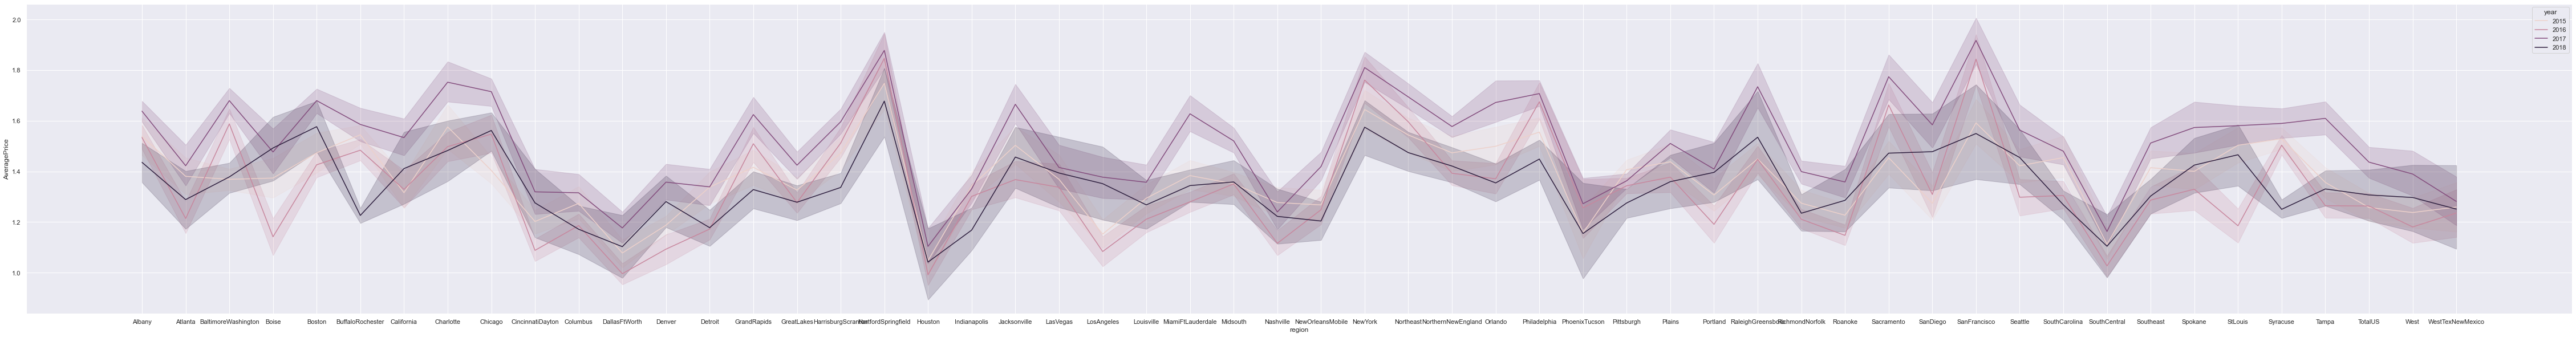

In [17]:
plt.figure(figsize=(80,10))
sns.lineplot(x='region',y='AveragePrice',hue='year',data=avoc)
plt.show()

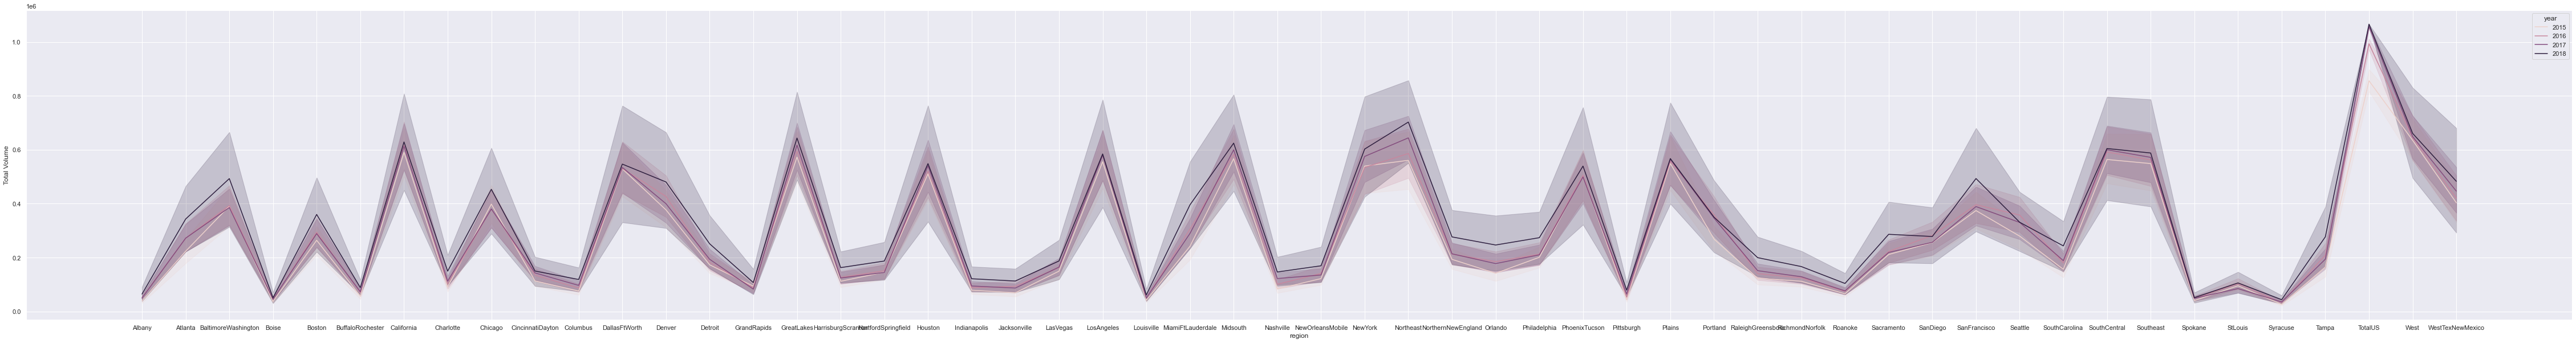

In [18]:
plt.figure(figsize=(80,10))
sns.lineplot(x='region',y='Total Volume',hue='year',data=avoc)
plt.show()

In [19]:
b=pd.DataFrame(avoc.groupby('year')['AveragePrice'].mean())
b.sort_values(by=['AveragePrice'],ascending=False)

,AveragePrice
year,
2017,1.509925
2015,1.375047
2018,1.347531
2016,1.336976


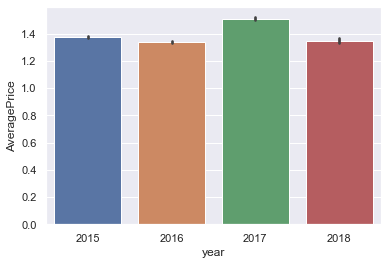

In [20]:
sns.barplot(x='year',y='AveragePrice',data=avoc)
plt.show()

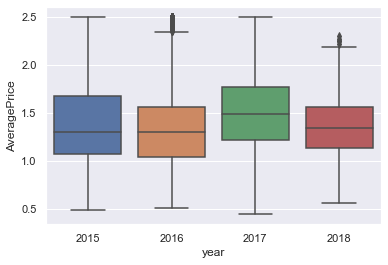

In [21]:
sns.boxplot(x='year',y='AveragePrice',data=avoc)
plt.show()

In [22]:
c=pd.DataFrame(avoc.groupby('year')['Total Volume'].mean())
c.sort_values(by=['Total Volume'],ascending=False)

,Total Volume
year,
2018,330494.350536
2017,295060.385558
2016,291667.266579
2015,270533.366785


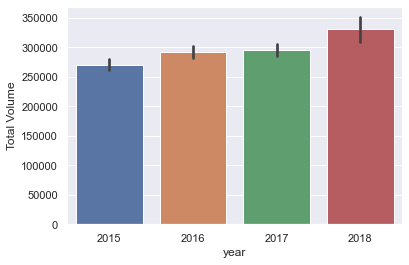

In [23]:
sns.barplot(x='year',y='Total Volume',data=avoc)
plt.show()

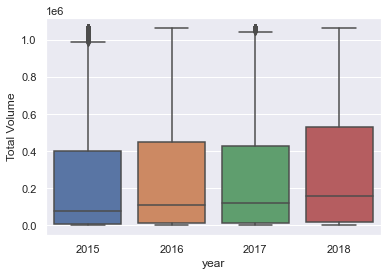

In [24]:
sns.boxplot(x='year',y='Total Volume',data=avoc)
plt.show()

Label Encoding 'type' categorical to continuous

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(avoc['type'])
avoc['type']=label_encoder.transform(avoc['type'])
avoc.head()



,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [26]:
avoc['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [27]:
avoc['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Data distribution

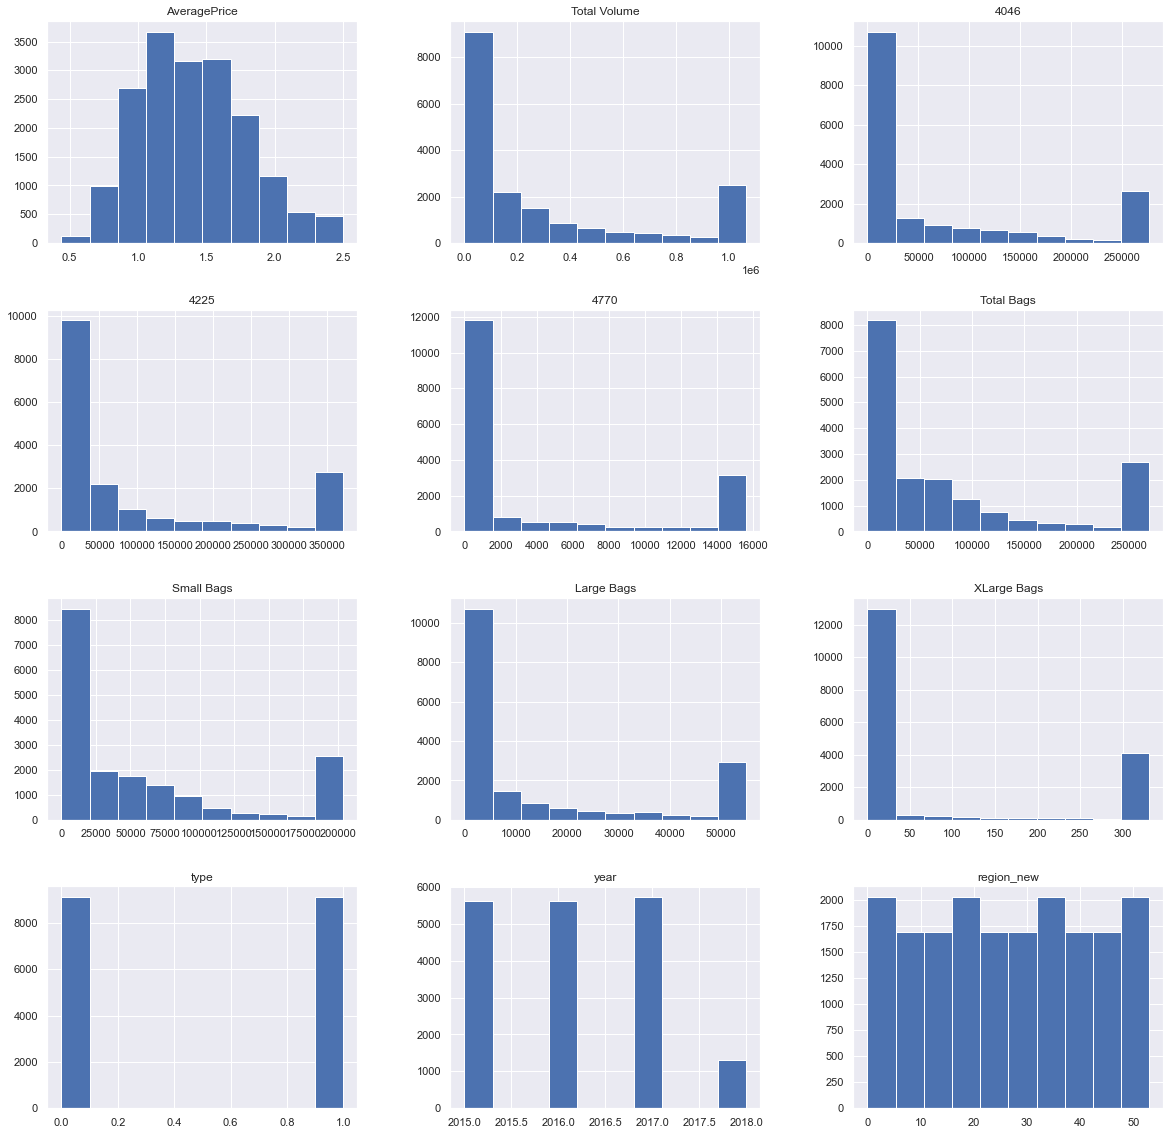

In [56]:
avoc.hist(figsize=(20,20))
plt.show()

Data Correlation

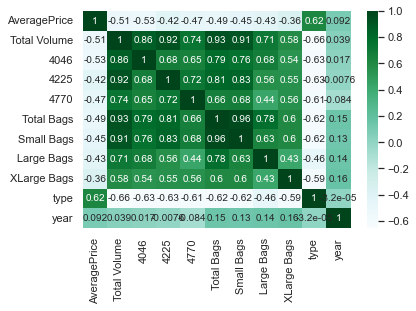

In [28]:
sns.heatmap(avoc.corr(),cbar=True,cmap='BuGn',annot=True)
plt.show()

Converting categorical type region column to continuous using One Hot Encoding 

<AxesSubplot:>

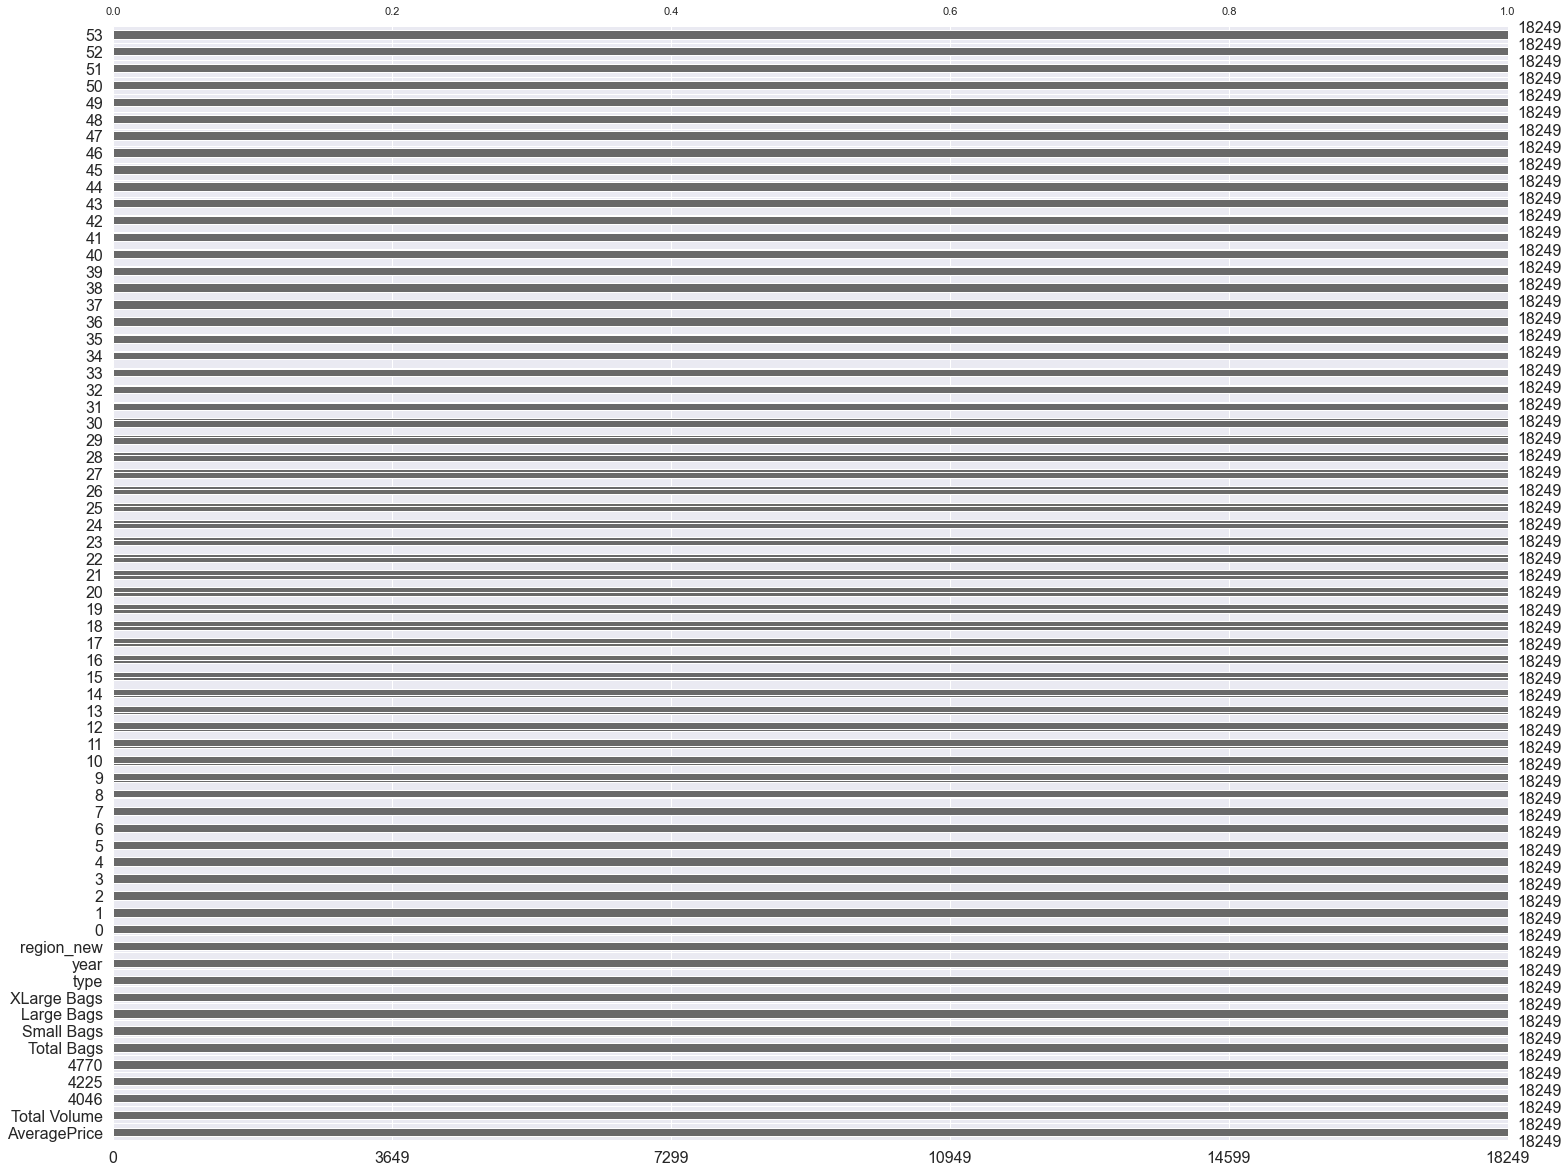

In [29]:
avoc_1=avoc
from sklearn.preprocessing import OneHotEncoder
avoc_1['region']=avoc_1['region'].astype('category')
avoc_1['region_new']=avoc['region'].cat.codes
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(avoc_1[['region']]).toarray())
avoc_new=avoc_1.join(enc_data)
avoc_new.drop(['region'],axis=1,inplace=True)
avoc_new.head()
msno.bar(avoc_new)

Splitting the dataset

In [30]:
x=avoc_new.drop(['AveragePrice'],axis=1)
y=avoc_new['AveragePrice']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

Standardizing the dataset

In [31]:
scaler=StandardScaler()
standardized_x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
standardized_x_test=pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)
print(avoc_new.shape)
print(standardized_x_train.shape)
print(y_train.shape)
print(standardized_x_test.shape)
print(y_test.shape)

(18249, 66)
(14599, 65)
(14599,)
(3650, 65)
(3650,)


# Machine Learning models

Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(standardized_x_train,y_train)
prediction=reg.predict(standardized_x_test)
print(prediction)

mae_linear=mean_absolute_error(y_test,prediction)
mape_linear=mean_absolute_percentage_error(y_test,prediction)
mse_linear=mean_squared_error(y_test,prediction)
rmse_linear=np.sqrt(mean_squared_error(y_test,prediction))
r2_linear=r2_score(y_test,prediction)
print('MAE=',mae_linear)
print('MAPE=',mape_linear)
print('MSE=',mse_linear)
print('RMSE=',rmse_linear)
print('R_Squared=',r2_linear)


[ 7.70015398e+09 -2.08418451e+10 -2.08418451e+10 ...  7.51261966e+10
  4.12306059e+10  6.34452650e+09]
MAE= 16361554585.472176
MAPE= 12773265303.183489
MSE= 4.874770292811685e+20
RMSE= 22078881975.343964
R_Squared= -3.122290145434753e+21


Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(standardized_x_train,y_train)
prediction=dtr.predict(standardized_x_test)
print(prediction)
mae_dtr=mean_absolute_error(y_test,prediction)
mape_dtr=mean_absolute_percentage_error(y_test,prediction)
mse_dtr=mean_squared_error(y_test,prediction)
rmse_dtr=np.sqrt(mean_squared_error(y_test,prediction))
r2_dtr=r2_score(y_test,prediction)
print('MAE=',mae_dtr)
print('MAPE=',mape_dtr)
print('MSE=',mse_dtr)
print('RMSE=',rmse_dtr)
print('R_Squared=',r2_dtr)


[0.98 0.99 1.5  ... 0.67 1.95 2.39]
MAE= 0.17804781956526128
MAPE= 0.12947456258213383
MSE= 0.06665194115136727
RMSE= 0.25817037233456375
R_Squared= 0.5730943479780282


Random Forest Regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(standardized_x_train,y_train)
prediction=rfr.predict(standardized_x_test)
print(prediction)
mae_rfr=mean_absolute_error(y_test,prediction)
mape_rfr=mean_absolute_percentage_error(y_test,prediction)
mse_rfr=mean_squared_error(y_test,prediction)
rmse_rfr=np.sqrt(mean_squared_error(y_test,prediction))
r2_rfr=r2_score(y_test,prediction)
print('MAE=',mae_rfr)
print('MAPE=',mape_rfr)
print('MSE=',mse_rfr)
print('RMSE=',rmse_rfr)
print('R_Squared=',r2_rfr)


[1.0071 1.0111 1.6634 ... 0.6157 1.6539 1.968 ]
MAE= 0.14081410481267495
MAPE= 0.10533626513034351
MSE= 0.03776723424067972
RMSE= 0.19433793824335927
R_Squared= 0.7581008822838586


Support Vector Regression

In [46]:
from sklearn.svm import SVR
svr_1=SVR(kernel='rbf')
svr_1.fit(standardized_x_train,y_train)
prediction=svr_1.predict(standardized_x_test)
print(prediction)
mae_svr=mean_absolute_error(y_test,prediction)
mape_svr=mean_absolute_percentage_error(y_test,prediction)
mse_svr=mean_squared_error(y_test,prediction)
rmse_svr=np.sqrt(mean_squared_error(y_test,prediction))
r2_svr=r2_score(y_test,prediction)
print('MAE=',mae_svr)
print('MAPE=',mape_svr)
print('MSE=',mse_svr)
print('RMSE=',rmse_svr)
print('R_Squared=',r2_svr)


[0.95160833 0.97113867 1.62437537 ... 0.82699256 1.59087735 2.00979375]
MAE= 0.15407099019526518
MAPE= 0.11260208428986404
MSE= 0.04438403700303836
RMSE= 0.21067519313634997
R_Squared= 0.71572026367366


Hyperparameter Tuning(Ridge Regression)

In [47]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
model=RidgeCV(alphas=np.arange(0,1,.01),cv=cv,scoring='neg_mean_absolute_error')
model.fit(standardized_x_train,y_train)
print('alpha(Ridge):',model.alpha_)

alpha(Ridge): 0.01


Ridge Regression

In [48]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha='0.01')
rr.fit(standardized_x_train,y_train)
prediction=rr.predict(standardized_x_test)
print(prediction)
mae_ridge=mean_absolute_error(y_test,prediction)
mape_ridge=mean_absolute_percentage_error(y_test,prediction)
mse_ridge=mean_squared_error(y_test,prediction)
rmse_ridge=np.sqrt(mean_squared_error(y_test,prediction))
r2_ridge=r2_score(y_test,prediction)
print('MAE=',mae_ridge)
print('MAPE=',mape_ridge)
print('MSE=',mse_ridge)
print('RMSE=',rmse_ridge)
print('R_Squared=',r2_ridge)


[1.11640353 1.09514389 1.64611387 ... 0.79754798 1.7376089  2.08726351]
MAE= 0.19644765532891137
MAPE= 0.14699226161859208
MSE= 0.06705090683296774
RMSE= 0.258941898566006
R_Squared= 0.5705389729732515


Hyperparameter Tuning(Lasso Regression)

In [49]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
model=LassoCV(alphas=np.arange(0,1,.01),cv=cv,n_jobs=-1)
model.fit(standardized_x_train,y_train)
print('alpha(Lasso):',model.alpha_)

alpha(Lasso): 0.0


Lasso Regression

In [50]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0)
lasso.fit(standardized_x_train,y_train)
prediction=lasso.predict(standardized_x_test)
print(prediction)
mae_lasso=mean_absolute_error(y_test,prediction)
mape_lasso=mean_absolute_percentage_error(y_test,prediction)
mse_lasso=mean_squared_error(y_test,prediction)
rmse_lasso=np.sqrt(mean_squared_error(y_test,prediction))
r2_lasso=r2_score(y_test,prediction)
print('MAE=',mae_lasso)
print('MAPE=',mape_lasso)
print('MSE=',mse_lasso)
print('RMSE=',rmse_lasso)
print('R_Squared=',r2_lasso)


[1.11650446 1.09535136 1.64632046 ... 0.79736203 1.73757286 2.08727471]
MAE= 0.1964445555894393
MAPE= 0.1469889629674428
MSE= 0.06705023556252414
RMSE= 0.2589406023831028
R_Squared= 0.5705432724601303


Hyperparameter Tuning(Elastic Net Regression)

In [51]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
ratios=np.arange(0,1,.01)
alphas=[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]
model=ElasticNetCV(l1_ratio=ratios,alphas=alphas,cv=cv,n_jobs=-1)
model.fit(standardized_x_train,y_train)
print('alpha(Elastic Net):',model.alpha_)
print('l1_ratio:',model.l1_ratio_)

alpha(Elastic Net): 0.001
l1_ratio: 0.0


Elastic Net Regression

In [52]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=.001,l1_ratio=0)
elastic.fit(standardized_x_train,y_train)
prediction=elastic.predict(standardized_x_test)
print(prediction)
mae_elastic=mean_absolute_error(y_test,prediction)
mape_elastic=mean_absolute_percentage_error(y_test,prediction)
mse_elastic=mean_squared_error(y_test,prediction)
rmse_elastic=np.sqrt(mean_squared_error(y_test,prediction))
r2_elastic=r2_score(y_test,prediction)
print('MAE=',mae_elastic)
print('MAPE=',mape_elastic)
print('MSE=',mse_elastic)
print('RMSE=',rmse_elastic)
print('R_Squared=',r2_elastic)


[1.11638604 1.094259   1.64641588 ... 0.80038138 1.73769407 2.08433103]
MAE= 0.19641400981746457
MAPE= 0.14697323086546532
MSE= 0.06703324196494775
RMSE= 0.25890778660547803
R_Squared= 0.5706521164446898


Comparing all the algorithms to determine the best one

In [54]:
MAE= {'Linear Regression':mae_linear,'Decision Tree Regression':mae_dtr,
      'Random Forest Regression':mae_rfr,'Support Vector Regression':mae_svr,
      'Ridge Regression':mae_ridge,'Lasso Regression':mae_lasso,
      'Elastic Net Regression':mae_elastic}

MAPE={'Linear Regression':mape_linear,'Decision Tree Regression':mape_dtr,
      'Random Forest Regression':mape_rfr,'Support Vector Regression':mape_svr,
      'Ridge Regression':mape_ridge,'Lasso Regression':mape_lasso,
      'Elastic Net Regression':mape_elastic}

 
MSE={'Linear Regression':mse_linear,'Decision Tree Regression':mse_dtr,
     'Random Forest Regression':mse_rfr,'Support Vector Regression':mse_svr,
     'Ridge Regression':mse_ridge,'Lasso Regression':mse_lasso,
     'Elastic Net Regression':mse_elastic}

RMSE={'Linear Regression':rmse_linear,'Decision Tree Regression':rmse_dtr,
      'Random Forest Regression':rmse_rfr,'Support Vector Regression':rmse_svr,
      'Ridge Regression':rmse_ridge,'Lasso Regression':rmse_lasso,
      'Elastic Net Regression':rmse_elastic}

R2={'Linear Regression':r2_linear,'Decision Tree Regression':r2_dtr,
    'Random Forest Regression':r2_rfr,'Support Vector Regression':r2_svr,
    'Ridge Regression':r2_ridge,'Lasso Regression':r2_lasso,
    'Elastic Net Regression':r2_elastic}



dict={'Mean Absolute Error':MAE,'Mean Absolute Percentage Error':MAPE,
      'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
      'R-Squared':R2}
eval_metric_comp=pd.DataFrame(dict)
eval_metric_comp

,Mean Absolute Error,Mean Absolute Percentage Error,Mean Squared Error,Root Mean Squared Error,R-Squared
Linear Regression,1.636155e+10,1.277327e+10,4.874770e+20,2.207888e+10,-3.122290e+21
Decision Tree Regression,1.780478e-01,1.294746e-01,6.665194e-02,2.581704e-01,5.730943e-01
Random Forest Regression,1.408141e-01,1.053363e-01,3.776723e-02,1.943379e-01,7.581009e-01
Support Vector Regression,1.540710e-01,1.126021e-01,4.438404e-02,2.106752e-01,7.157203e-01
Ridge Regression,1.964477e-01,1.469923e-01,6.705091e-02,2.589419e-01,5.705390e-01
Lasso Regression,1.964446e-01,1.469890e-01,6.705024e-02,2.589406e-01,5.705433e-01
Elastic Net Regression,1.964140e-01,1.469732e-01,6.703324e-02,2.589078e-01,5.706521e-01


# Conclusion

So we can conclude that Random Forest Regression gives us the best values followed by Support Vector 
Regression